# **Introduction**


In this exercise, you will implement the K-means clustering algorithm and apply it to Dataset with multiple features. We strongly recommend Asking your colleagues and your Coach Using Questions And Discussions Channel on Microsoft Teams.

Run the next cell to import the needed libraries and to load the dataset

In [ ]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt

# **1- Implementing K-means**
The K-means algorithm is a method to automatically cluster similar data examples together. Concretely, you are given a training set {𝑥(1),⋯,𝑥(𝑚)}

The K-means algorithm steps is as follows:

Centroids = Init_Centroids(X, K)
for i in range(iterations):
    # Get the Closet Centroid list that corresponds to each training example
    ExamplesCentroids = GetExamplesCentroids(X, Centroids)
 
    # Change Centroid Position using Mean
    Centroids = computeCentroidsMeans(X, ExamplesCentroids, K):

Then you may use the last Centroids values to get a cluster for any other input

Initialize our train-test Data

In [ ]:
data = pd.read_excel("Training Data.xlsx")
# ==================== YOUR CODE HERE =================================
X = data.iloc[:,[0,1,2]].values
# =====================================================================

### **1.1 - Calculate Euclidean Distance**
Euclidean Distance is a method to calculate distance between two points ( P and Q )using the Following equation 
$$ d\left( P,Q\right)   = \sqrt {\left( Q_{0}-P_{0}\right)^2 + \left  ( Q_{1}-P_{1}\right)^2} $$

In [ ]:
def calc_distance(X1, X2):
  # ==================== YOUR CODE HERE =================================
  return (sum(X1-X2)**2)**0.5
  # =====================================================================

Assign clusters based on closest centroid

### **1.2 - Get Examples Centroids**
in this section we need to get the nearest centroid to each training example $x^{(i)}$ Given the list of centroids positions.

Your task is to complete the code in the function `calc_centroids`. This function takes the data matrix `cluster_array` and the locations of the centroids inside `clusters` and should output a one-dimensional array `new_centroids` that holds the index (a value in $\{1, ..., K\}$, where $K$ is total number of centroids) of the closest centroid to every training example.
Also be noted that the function should get each example nearest Centroid **According To the Euclidean Distance**


In [ ]:
def assign_clusters(centroids, cluster_array):
  
  '''
    Parameters :
                  cluster_array ->  Training Examples array of shape (m,n)
                  clusters -> Value of Each Centroid (K, n)
    Return : 
                  new_centroids -> List of the number of cluster that corresponds to the training example 
                                        (Ex.)  the Centroid which is closest to 5th point in the training data
                                        is the centroid number 3 (Cluster 3) then new_centroids[5] = 3
    Instructions:
                  - Go over every example
                  - find its closest centroid, and store
                  the index inside `new_centroids` at the appropriate location.

                  new_centroids[i] should contain the index of the centroid
                  closest to example i. then, it should be a value in the 
                  range [0,K-1]
    '''
  # ==================== YOUR CODE HERE =================================
  
  clusters = []
  for i in range(cluster_array.shape[0]):
    distances = []
    for centroid in centroids:
      distances.append(calc_distance(centroid , cluster_array[i]))
    cluster = [z for z , val  in enumerate(distances) if val == min(distances)]
    clusters.append(cluster[0])
  return clusters

  # =====================================================================

Calculate the Mean for the current centroids


In [ ]:
def calc_centroids(clusters , cluster_array):
    # ====================== YOUR CODE HERE ======================
    new_centroids = []
    c_df = pd.concat([pd.DataFrame(cluster_array),pd.DataFrame(clusters,columns=['cluster'])],axis = 1)
    for c in set(c_df['cluster']):
      # current_c = c_df[c_df['cluster']==c][c_df.columns[:-1]]
      current_c = c_df[c_df['cluster']\
                       ==c][c_df.columns[:-1]]
      cluster_mean = current_c.mean(axis = 0)
      new_centroids.append(cluster_mean)
    return new_centroids
    # =============================================================
    

Now Let's put it all together !

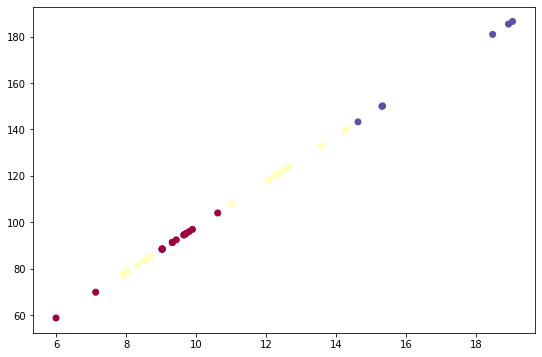

In [ ]:
k = 3
cluster_var = []
centroids =[X[i+2] for i in range(k)]
cluster = assign_clusters(centroids,X)
inital_clusters = cluster
for i in range(20):
   centroids = calc_centroids(cluster,X)
   cluster = assign_clusters(centroids, X)

plt.subplots(figsize=(9,6))
plt.scatter(X[:, 0], X[:, 1],
            c=cluster,cmap=plt.cm.Spectral)

   

In [ ]:
test = pd.read_csv('Test Data.txt',header = None).to_numpy()
test_data_categories = assign_clusters(centroids, test)
print(test_data_categories)

[0, 1, 1, 2, 1, 2, 1, 0, 0, 1]


Save your output to a text file so we can process it

In [ ]:
import sys
f = open("Categories.txt", "w")
for i in test_data_categories:
  print(i, file = f)
f.close()